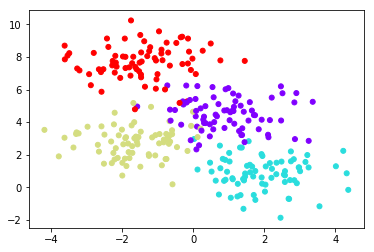

In [27]:
#### python data science hnadbook ######

############### creating 4 class random data ###############
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics


from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 300, centers =4,
                 random_state = 0, cluster_std = 1.0)
plt.scatter(X[:,0], X[:,1], c = y, s = 25, cmap = 'rainbow')
plt.savefig('bagging_1.eps', format='eps', dpi=1000)


C:\Users\alam.92\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


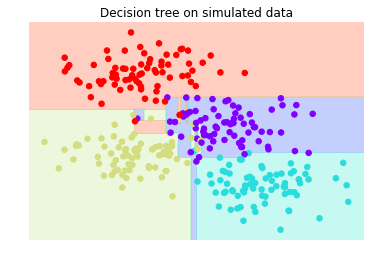

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)
#visualize classifier
def visualize_classifier(model, X, y, ax = None, cmap = 'rainbow'):
    ax = ax or plt.gca()
    
    #plot training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()       
    #fit the estimator
    model.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)       
            
visualize_classifier(DecisionTreeClassifier(), X, y)
plt.title('Decision tree on simulated data') 
plt.savefig('bagging_2.eps', format='eps', dpi=1000)

C:\Users\alam.92\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


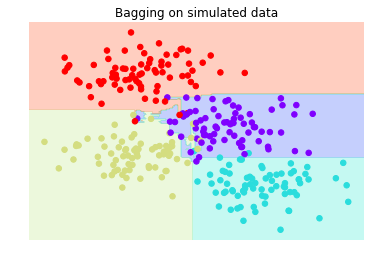

In [29]:
#Bagging on the same data set
from sklearn.ensemble import BaggingClassifier


tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators = 100, max_samples = 0.8,
                        random_state = 1)
bag.fit(X, y)
visualize_classifier(bag, X, y)
plt.title('Bagging on simulated data') 
plt.savefig('bagging_3.eps', format='eps', dpi=1000)

C:\Users\alam.92\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


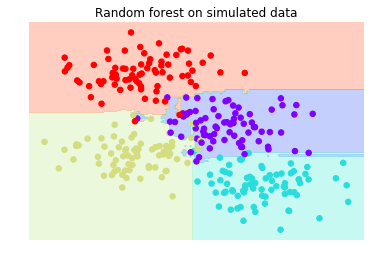

In [25]:
#Random forests on the same data set
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 0)
visualize_classifier(model, X, y)
plt.title('Random forest on simulated data') 
plt.savefig('random_forest_1.eps', format='eps', dpi=1000)

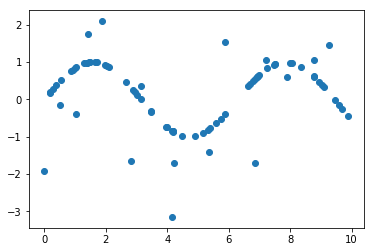

In [12]:
#Random Forest Regression 
import numpy as np
import matplotlib.pyplot as plt

############
#crease random data
###########
rng  = np.random.RandomState(1)
X = np.sort(10*rng.rand(80,1),axis = 0)
Y = np.sin(X).ravel()

Y[::5] += 5*(0.5 - rng.rand(16))
plt.scatter(X,Y)
plt.savefig('random_forest_2.eps', format='eps', dpi=1000)

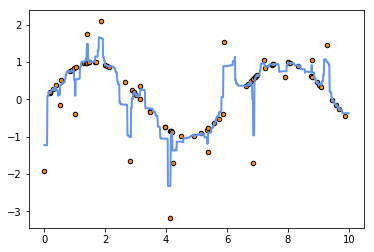

In [14]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(80)
forest.fit(X, Y)

X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_1 = forest.predict(X_test)
# plt.errorbar(X, Y, 0.3, fmt='o', alpha=0.5)

plt.scatter(X,Y,s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.savefig('random_forest_3.eps', format='eps', dpi=1000)

In [ ]:
# from sklearn.datasets import load_iris
# iris = load_iris()

# # Model (can also use single decision tree)
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=10)

# # Train
# model.fit(iris.data, iris.target)
# # Extract single tree
# estimator = model.estimators_[5]

# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = iris.feature_names,
#                 class_names = iris.target_names,
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')